In [31]:
#classification packages as well as for model evaluation
from sklearn.model_selection import train_test_split,StratifiedKFold, KFold, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,mean_squared_error
from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif,f_regression


In [33]:
#packages for data loading , data analysis and data preparation
from pandas.plotting import scatter_matrix
import yfinance as yf 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform,norm
from datetime import datetime

In [34]:
#Packahages for saving the model
from pickle import dump
from pickle import load

In [ ]:
##real time data 

# ticker  = yf.Ticker('AAPL')
# expiration  = ticker.options[0]
# opt_chain  = ticker.option_chain(expiration)

# print(opt_chain)

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   AAPL250620C00005000 2025-06-17 16:20:02+00:00     5.0     191.50  190.25   
1   AAPL250620C00010000 2025-06-09 17:59:26+00:00    10.0     192.64  184.70   
2   AAPL250620C00015000 2025-06-16 13:43:24+00:00    15.0     181.93  179.70   
3   AAPL250620C00020000 2025-06-03 13:50:53+00:00    20.0     183.00  174.70   
4   AAPL250620C00025000 2025-06-13 18:58:54+00:00    25.0     171.33  169.70   
..                  ...                       ...     ...        ...     ...   
75  AAPL250620C00320000 2025-06-16 18:20:54+00:00   320.0       0.01    0.00   
76  AAPL250620C00330000 2025-06-05 17:48:54+00:00   330.0       0.01    0.00   
77  AAPL250620C00340000 2025-05-23 16:47:17+00:00   340.0       0.01    0.00   
78  AAPL250620C00350000 2025-06-09 15:32:45+00:00   350.0       0.01    0.00   
79  AAPL250620C00360000 2025-06-17 13:30:01+00:00   360.0       0.01    0.00   

       ask    change  per

In [ ]:
# calls = opt_chain.calls
# puts = opt_chain.puts

# calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL250620C00005000,2025-06-17 16:20:02+00:00,5.0,191.50,190.25,191.10,-2.100006,-1.084714,5,826,12.875002,True,REGULAR,USD
1,AAPL250620C00010000,2025-06-09 17:59:26+00:00,10.0,192.64,184.70,186.60,0.000000,0.000000,40,51,9.125004,True,REGULAR,USD
2,AAPL250620C00015000,2025-06-16 13:43:24+00:00,15.0,181.93,179.70,181.70,0.000000,0.000000,2,3,9.281254,True,REGULAR,USD
3,AAPL250620C00020000,2025-06-03 13:50:53+00:00,20.0,183.00,174.70,176.65,0.000000,0.000000,1,6,7.750000,True,REGULAR,USD
4,AAPL250620C00025000,2025-06-13 18:58:54+00:00,25.0,171.33,169.70,171.70,0.000000,0.000000,4,2,7.375001,True,REGULAR,USD


In [95]:
tickers = ['AAPL', 'MSFT', 'GOOG','AMZN','TSLA','NVDA','AMD']
all_calls = []

for ticker_name in tickers:
    ticker = yf.Ticker(ticker_name)
    for expiry in ticker.options:  
        chain = ticker.option_chain(expiry)
        df = chain.calls.copy()
        df['Ticker'] = ticker_name
        df['Expiration'] = expiry
        all_calls.append(df)

real_options_data = pd.concat(all_calls, ignore_index=True)

real_options_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Ticker,Expiration
0,AAPL250620C00005000,2025-06-17 17:01:46+00:00,5.0,191.50,190.25,191.10,-2.100006,-1.084714,5.0,826.0,14.875001,True,REGULAR,USD,AAPL,2025-06-20
1,AAPL250620C00010000,2025-06-09 17:59:26+00:00,10.0,192.64,184.70,186.60,0.000000,0.000000,40.0,51.0,10.500003,True,REGULAR,USD,AAPL,2025-06-20
2,AAPL250620C00015000,2025-06-16 13:43:24+00:00,15.0,181.93,179.70,181.70,0.000000,0.000000,2.0,3.0,10.687503,True,REGULAR,USD,AAPL,2025-06-20
3,AAPL250620C00020000,2025-06-03 13:50:53+00:00,20.0,183.00,174.70,176.65,0.000000,0.000000,1.0,6.0,8.937504,True,REGULAR,USD,AAPL,2025-06-20
4,AAPL250620C00025000,2025-06-13 18:58:54+00:00,25.0,171.33,169.70,171.70,0.000000,0.000000,4.0,2.0,8.500005,True,REGULAR,USD,AAPL,2025-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10592,AMD271217C00180000,2025-06-17 18:44:18+00:00,180.0,25.10,24.85,25.60,-0.080000,-0.317712,193.0,515.0,0.503026,False,REGULAR,USD,AMD,2027-12-17
10593,AMD271217C00185000,2025-06-17 16:30:02+00:00,185.0,24.24,23.75,24.50,0.350000,1.465050,3.0,115.0,0.501592,False,REGULAR,USD,AMD,2027-12-17
10594,AMD271217C00190000,2025-06-17 16:05:30+00:00,190.0,23.55,22.70,23.45,1.400000,6.320540,10.0,268.0,0.500188,False,REGULAR,USD,AMD,2027-12-17
10595,AMD271217C00195000,2025-06-17 16:54:06+00:00,195.0,22.02,21.75,22.45,-0.180000,-0.810812,5.0,3293.0,0.503576,False,REGULAR,USD,AMD,2027-12-17


In [96]:
sport_prices = {ticker:yf.Ticker(ticker).history(period="1d")['Close'].iloc[-1] for ticker in tickers}
sport_prices

{'AAPL': np.float64(195.63999938964844),
 'MSFT': np.float64(478.0400085449219),
 'GOOG': np.float64(177.22999572753906),
 'AMZN': np.float64(214.82000732421875),
 'TSLA': np.float64(316.3500061035156),
 'NVDA': np.float64(144.1199951171875),
 'AMD': np.float64(127.0999984741211)}

In [97]:
##defining the moneyness

real_options_data['Spot'] = real_options_data['Ticker'].map(sport_prices)
#Calculate Moneyness = Spot/Strike

real_options_data['Moneyness'] = real_options_data['Spot']/real_options_data['strike']

real_options_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Ticker,Expiration,Spot,Moneyness
0,AAPL250620C00005000,2025-06-17 17:01:46+00:00,5.0,191.50,190.25,191.10,-2.100006,-1.084714,5.0,826.0,14.875001,True,REGULAR,USD,AAPL,2025-06-20,195.639999,39.128000
1,AAPL250620C00010000,2025-06-09 17:59:26+00:00,10.0,192.64,184.70,186.60,0.000000,0.000000,40.0,51.0,10.500003,True,REGULAR,USD,AAPL,2025-06-20,195.639999,19.564000
2,AAPL250620C00015000,2025-06-16 13:43:24+00:00,15.0,181.93,179.70,181.70,0.000000,0.000000,2.0,3.0,10.687503,True,REGULAR,USD,AAPL,2025-06-20,195.639999,13.042667
3,AAPL250620C00020000,2025-06-03 13:50:53+00:00,20.0,183.00,174.70,176.65,0.000000,0.000000,1.0,6.0,8.937504,True,REGULAR,USD,AAPL,2025-06-20,195.639999,9.782000
4,AAPL250620C00025000,2025-06-13 18:58:54+00:00,25.0,171.33,169.70,171.70,0.000000,0.000000,4.0,2.0,8.500005,True,REGULAR,USD,AAPL,2025-06-20,195.639999,7.825600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10592,AMD271217C00180000,2025-06-17 18:44:18+00:00,180.0,25.10,24.85,25.60,-0.080000,-0.317712,193.0,515.0,0.503026,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.706111
10593,AMD271217C00185000,2025-06-17 16:30:02+00:00,185.0,24.24,23.75,24.50,0.350000,1.465050,3.0,115.0,0.501592,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.687027
10594,AMD271217C00190000,2025-06-17 16:05:30+00:00,190.0,23.55,22.70,23.45,1.400000,6.320540,10.0,268.0,0.500188,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.668947
10595,AMD271217C00195000,2025-06-17 16:54:06+00:00,195.0,22.02,21.75,22.45,-0.180000,-0.810812,5.0,3293.0,0.503576,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.651795


In [163]:
##Time to maturity
today = datetime.today()
real_options_data['Expiration'] = pd.to_datetime(real_options_data['Expiration'])
real_options_data['TimeToMaturity'] = (real_options_data['Expiration']-today).dt.days/252

real_options_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,inTheMoney,contractSize,currency,Ticker,Expiration,Spot,Moneyness,TimeToMaturity,Vol,ModelPrice
0,AAPL250620C00005000,2025-06-17 17:01:46+00:00,5.0,191.50,190.25,191.10,-2.100006,-1.084714,5.0,826.0,...,True,REGULAR,USD,AAPL,2025-06-20,195.639999,39.128000,0.003968,145.574711,-757.726190
1,AAPL250620C00010000,2025-06-09 17:59:26+00:00,10.0,192.64,184.70,186.60,0.000000,0.000000,40.0,51.0,...,True,REGULAR,USD,AAPL,2025-06-20,195.639999,19.564000,0.003968,34.662483,-189.788134
2,AAPL250620C00015000,2025-06-16 13:43:24+00:00,15.0,181.93,179.70,181.70,0.000000,0.000000,2.0,3.0,...,True,REGULAR,USD,AAPL,2025-06-20,195.639999,13.042667,0.003968,14.702856,-83.856812
3,AAPL250620C00020000,2025-06-03 13:50:53+00:00,20.0,183.00,174.70,176.65,0.000000,0.000000,1.0,6.0,...,True,REGULAR,USD,AAPL,2025-06-20,195.639999,9.782000,0.003968,7.912626,-46.746459
4,AAPL250620C00025000,2025-06-13 18:58:54+00:00,25.0,171.33,169.70,171.70,0.000000,0.000000,4.0,2.0,...,True,REGULAR,USD,AAPL,2025-06-20,195.639999,7.825600,0.003968,4.859155,-29.575259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10592,AMD271217C00180000,2025-06-17 18:44:18+00:00,180.0,25.10,24.85,25.60,-0.080000,-0.317712,193.0,515.0,...,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.706111,3.615079,0.458226,0.658505
10593,AMD271217C00185000,2025-06-17 16:30:02+00:00,185.0,24.24,23.75,24.50,0.350000,1.465050,3.0,115.0,...,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.687027,3.615079,0.459384,0.666367
10594,AMD271217C00190000,2025-06-17 16:05:30+00:00,190.0,23.55,22.70,23.45,1.400000,6.320540,10.0,268.0,...,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.668947,3.615079,0.460549,0.674717
10595,AMD271217C00195000,2025-06-17 16:54:06+00:00,195.0,22.02,21.75,22.45,-0.180000,-0.810812,5.0,3293.0,...,False,REGULAR,USD,AMD,2027-12-17,127.099998,0.651795,3.615079,0.461714,0.683424


In [164]:
## defining the parameters for the equations of black scholes

true_alpha = 0.1
true_beta = 0.1
true_sigma0 = 0.2
risk_free_rate = 0.0433

In [165]:
#function for calculating the volatility

def option_vol_from_surface(moneyness,time_to_maturity):
    vol = true_sigma0 + time_to_maturity*true_alpha + true_beta*np.square(moneyness-1)
    return vol

In [166]:
##function for black-scholes

def call_option_price(moneyness,time_to_maturity,option_vol):
    d1 = (np.log(1/moneyness)+((risk_free_rate+np.square(option_vol)/2))*time_to_maturity)/option_vol*np.sqrt(time_to_maturity)
    d2 = (np.log(1/moneyness)+((risk_free_rate-np.square(option_vol)/2))*time_to_maturity)/option_vol*np.sqrt(time_to_maturity)
    
    N_d1 =norm.cdf(d1)
    N_d2 =norm.cdf(d2)
    
    call_price = N_d1- moneyness*np.exp(-risk_free_rate*time_to_maturity)*moneyness*N_d2
    return call_price
    

In [167]:
##data generating for testing

# data_points = 10000
# KS = 1+0.25*np.random.randn(data_points)
# TS = np.random.random(data_points)

# vol = np.array([option_vol_from_surface(k,t) for k,t in zip(KS,TS)])
# Ps = np.array([call_option_price(k,t,opt_vol) for k,t,opt_vol in zip(KS,TS,vol)])

real_options_data['Vol'] = real_options_data.apply(
    lambda row: option_vol_from_surface(row['Moneyness'],row['TimeToMaturity']),axis=1
)

real_options_data['ModelPrice'] = real_options_data.apply(
    lambda row: call_option_price(row['Moneyness'],row['TimeToMaturity'],row['Vol']),axis=1
)

In [168]:
##data cleaning 

dataset = real_options_data[['lastPrice','Moneyness','TimeToMaturity','Vol']]
dataset = dataset.fillna(dataset.median(numeric_only=True))
dataset.columns = ['Price','Moneyness','Time','Vol']

##handle the underflow

dataset['Moneyness'] = np.log1p(dataset['Moneyness'])
dataset['Price'] = np.log1p(dataset['Price'])
dataset['Vol'] = np.log1p(dataset['Vol'])

dataset = dataset[(dataset['Vol']>0) & (dataset['Time']>=0)]




In [170]:
##Y is the target

# Y = Ps

# X = np.concatenate([KS.reshape(-1,1),TS.reshape(-1,1),vol.reshape(-1,1)],axis = 1)
# dataset = pd.DataFrame(np.concatenate([Y.reshape(-1,1),X],axis=1),columns=['Price','Moneyness','Time','Vol'])

# dataset



for col in ['Price','Moneyness','Time','Vol']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3-Q1
    upper_bound = Q1 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    dataset= dataset[(dataset[col]>=lower_bound) &(dataset[col] <=upper_bound)]
    
dataset = dataset[dataset['Vol']>=np.log1p(0.01)]
dataset = dataset[dataset['Price']>=np.log1p(1)]

X = dataset[['Moneyness','Time','Vol']].values
Y = dataset['Price'].values

dataset

,Price,Moneyness,Time,Vol
25,4.230331,0.918258,0.003968,0.203668
26,4.122770,0.895755,0.003968,0.199321
27,4.040944,0.874397,0.003968,0.195724
28,3.949897,0.854092,0.003968,0.192762
29,3.848018,0.834762,0.003968,0.190335
...,...,...,...,...
10324,3.184698,0.701512,1.087302,0.269079
10325,3.079614,0.681931,1.087302,0.269095
10326,2.988204,0.663451,1.087302,0.269319
10327,2.886475,0.645981,1.087302,0.269706


<Figure size 1500x1500 with 0 Axes>

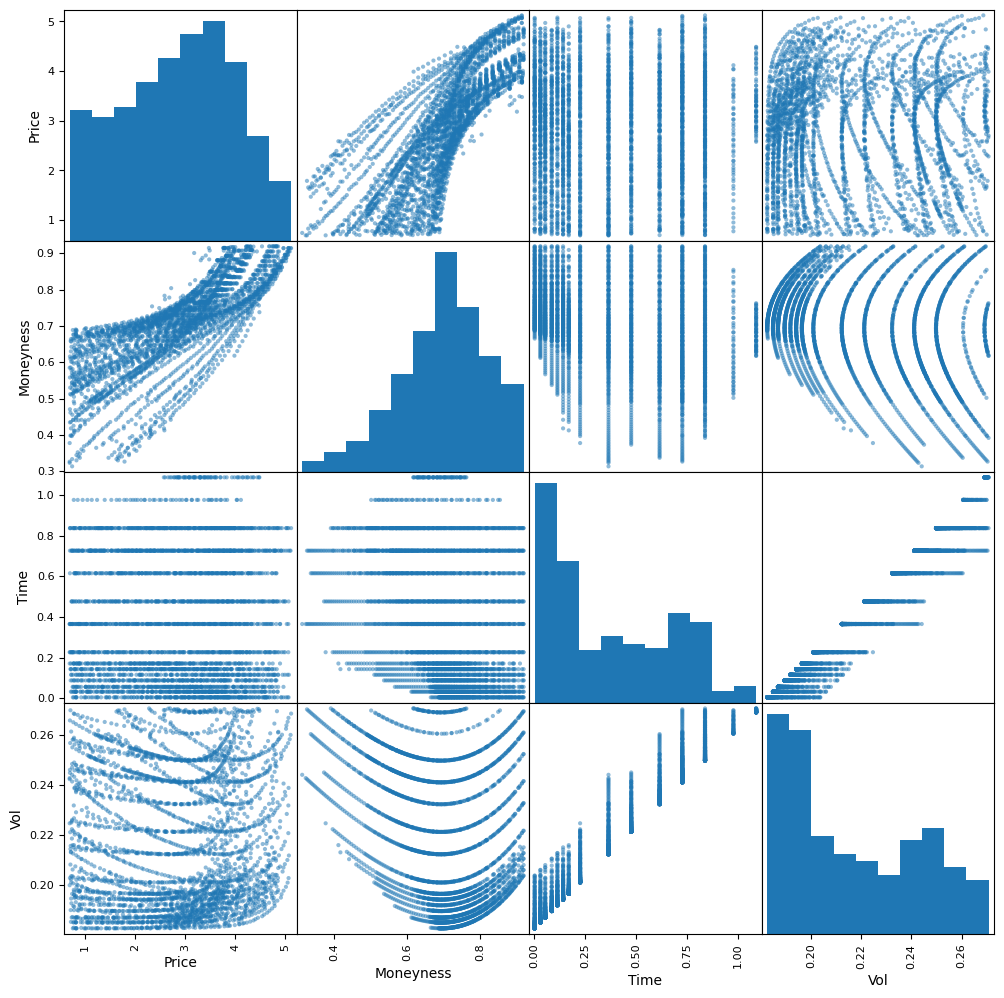

In [171]:
#data visualization 

plt.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
plt.show()

In [174]:
#now done with data visualization now we deal with best feature selection

bestFeatures = SelectKBest(k='all' , score_func=f_regression)
fit = bestFeatures.fit(X,Y)
dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(['Moneyness','Time','Vol'])
featureScore = pd.concat([dfColumns,dfScores],axis=1)
featureScore.columns = ['Specs','Scores']
featureScore.nlargest(10,'Scores').set_index('Specs')


,Scores
Specs,
Moneyness,4804.982546
Vol,3.337657
Time,0.199513


In [175]:
#normalization initialisation

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [176]:
#model training

validation_size = 0.2
train_size = int(len(X_scaled)*(1-validation_size))

X_train,X_test = X_scaled[0:train_size],X_scaled[train_size:]
Y_train,Y_test = Y[0:train_size],Y[train_size:]

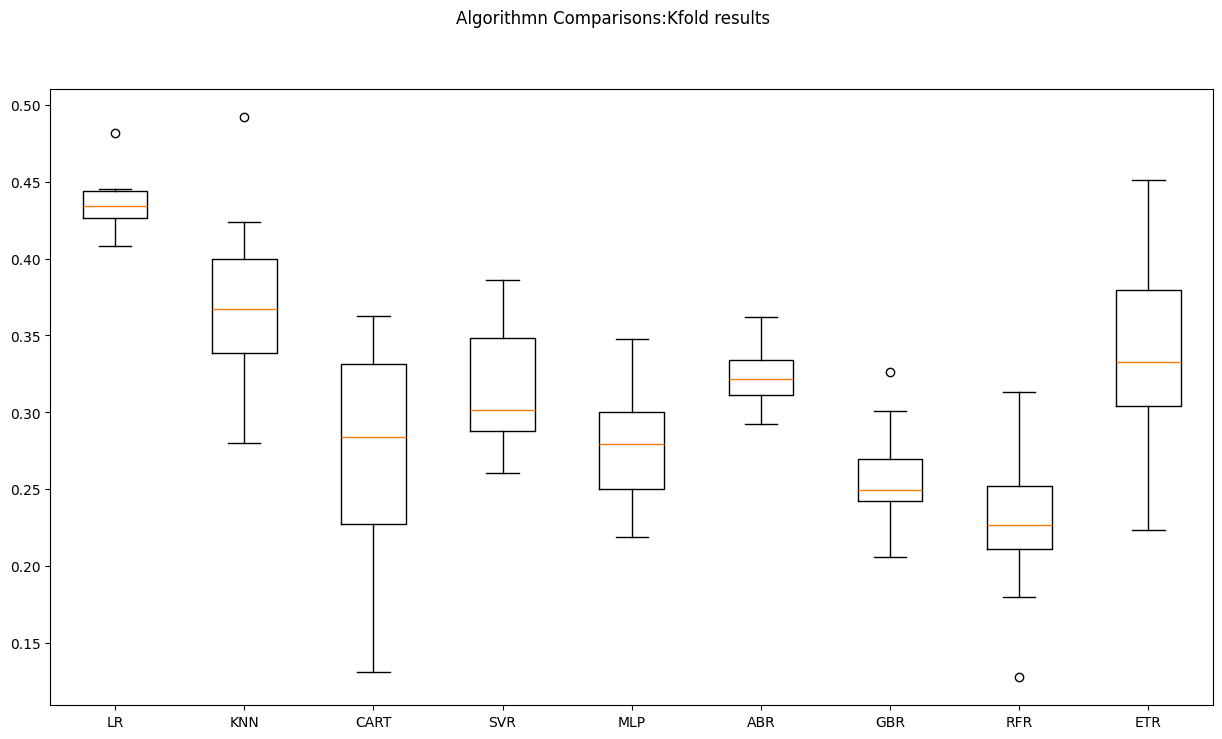

In [189]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
num_folds = 10

seed = 42
scoring = 'neg_mean_squared_error'
models =[]

models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
models.append(('MLP',MLPRegressor(hidden_layer_sizes=(50, 30, 20),activation='tanh',solver='adam',alpha=0.0001,learning_rate='adaptive',max_iter=2000)))
models.append(('ABR',AdaBoostRegressor()))
models.append(('GBR',GradientBoostingRegressor()))
models.append(('RFR',RandomForestRegressor()))
models.append(('ETR',ExtraTreesRegressor()))

names = []
kfold_results =[]
test_results =[]
train_results = []

for name, model in models:
    names.append(name)
    kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
    cv_results = -1*cross_val_score(model,X_train,Y_train,cv = kfold,scoring=scoring)
    kfold_results.append(cv_results)
    res = model.fit(X_train,Y_train)
    train_res = mean_squared_error(res.predict(X_train),Y_train)
    train_results.append(train_res)
    test_res = mean_squared_error(res.predict(X_test),Y_test)
    test_results.append(test_res)


fig = plt.figure()
fig.suptitle('Algorithmn Comparisons:Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()




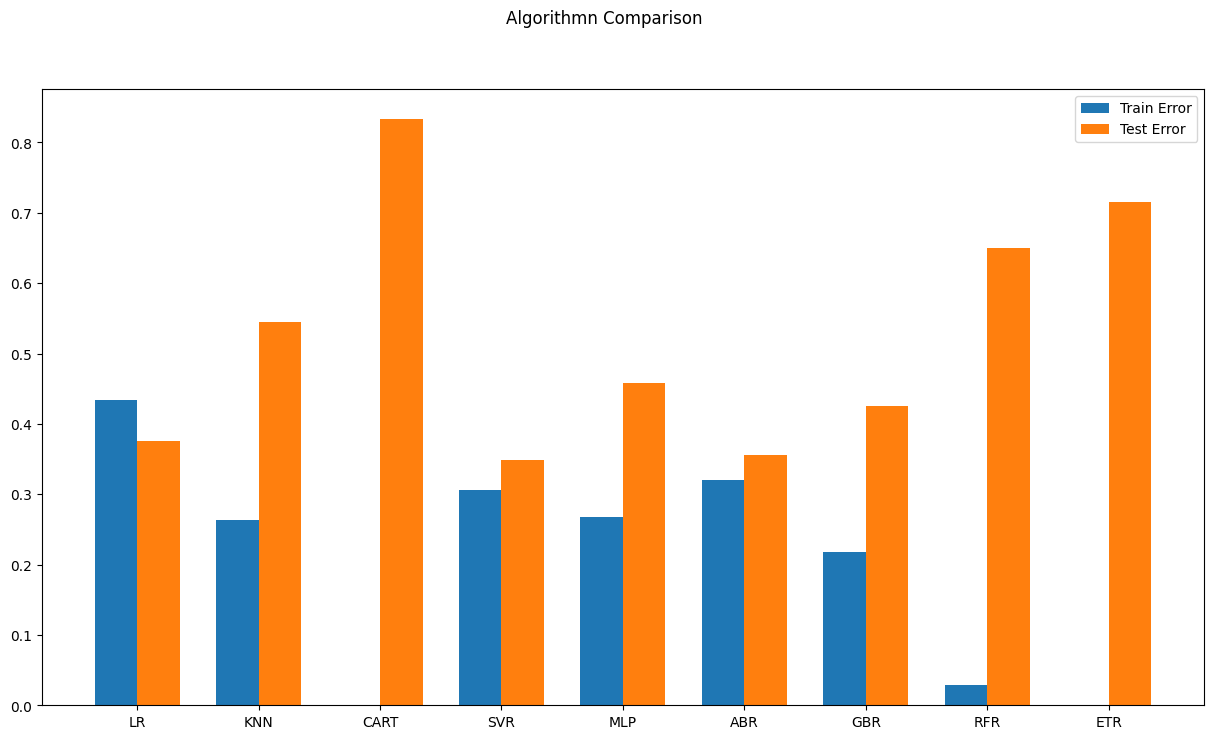

In [190]:
fig = plt.figure()
ind = np.arange(len(names))
width = 0.35

fig.suptitle('Algorithmn Comparison')
ax = fig.add_subplot(111)
plt.bar(ind-width/2,train_results,width=width,label='Train Error')
plt.bar(ind+width/2,test_results,width=width,label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()


In [191]:
##Do hyperparametr tuning on the neural network model
##GRID SEARCH for MLP

param_grid={'hidden_layer_sizes':[(20,),(50,),(20,20),(20,30,20),(50, 30, 20)]}
model = MLPRegressor(activation='tanh',solver='adam',alpha=0.0001,learning_rate='adaptive',max_iter=2000)
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(X_train,Y_train)

print("Best : %f using  %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print("%f(%f) with: %r" %(mean,stdev,param))

Best : -0.273420 using  {'hidden_layer_sizes': (50, 30, 20)}
-0.310442(0.032475) with: {'hidden_layer_sizes': (20,)}
-0.304370(0.033445) with: {'hidden_layer_sizes': (50,)}
-0.278887(0.032886) with: {'hidden_layer_sizes': (20, 20)}
-0.276989(0.032329) with: {'hidden_layer_sizes': (20, 30, 20)}
-0.273420(0.035468) with: {'hidden_layer_sizes': (50, 30, 20)}


In [195]:
##Best model it has hidden layers=(20,30,20)

model_tuned = MLPRegressor(hidden_layer_sizes=(50, 30, 20),activation='tanh',solver='adam',alpha=0.0001,learning_rate='adaptive',max_iter=2000)
model_tuned.fit(X_train,Y_train)

predictions = model_tuned.predict(X_test)
print(mean_squared_error(Y_test,predictions))


0.4511689834699182


In [197]:
from sklearn.metrics import r2_score, mean_squared_error

# Baseline MSE (predicting mean)
y_mean = np.mean(Y_train) * np.ones_like(Y_test)
baseline_mse = mean_squared_error(Y_test, y_mean)

# Your model's MSE
your_mse = 0.45

# Improvement over baseline
improvement = (baseline_mse - your_mse) / baseline_mse
print(f"Improvement over baseline: {improvement:.2%}")

# R-squared
r2 = r2_score(Y_test, predictions)
print(f"R² score: {r2:.4f}")

# Normalized MSE
nmse = your_mse / np.var(Y_test)
print(f"Normalized MSE: {nmse:.4f}")

Improvement over baseline: 55.73%
R² score: 0.4403
Normalized MSE: 0.5582


In [198]:
import joblib
joblib.dump(model_tuned, 'option_pricing_model.pkl')
print("Model saved successfully!")
# kelly criterion

Model saved successfully!
